
Generating Figure 8: Gravity River Mechanics...
Visualization saved to gravity_river_viz.png


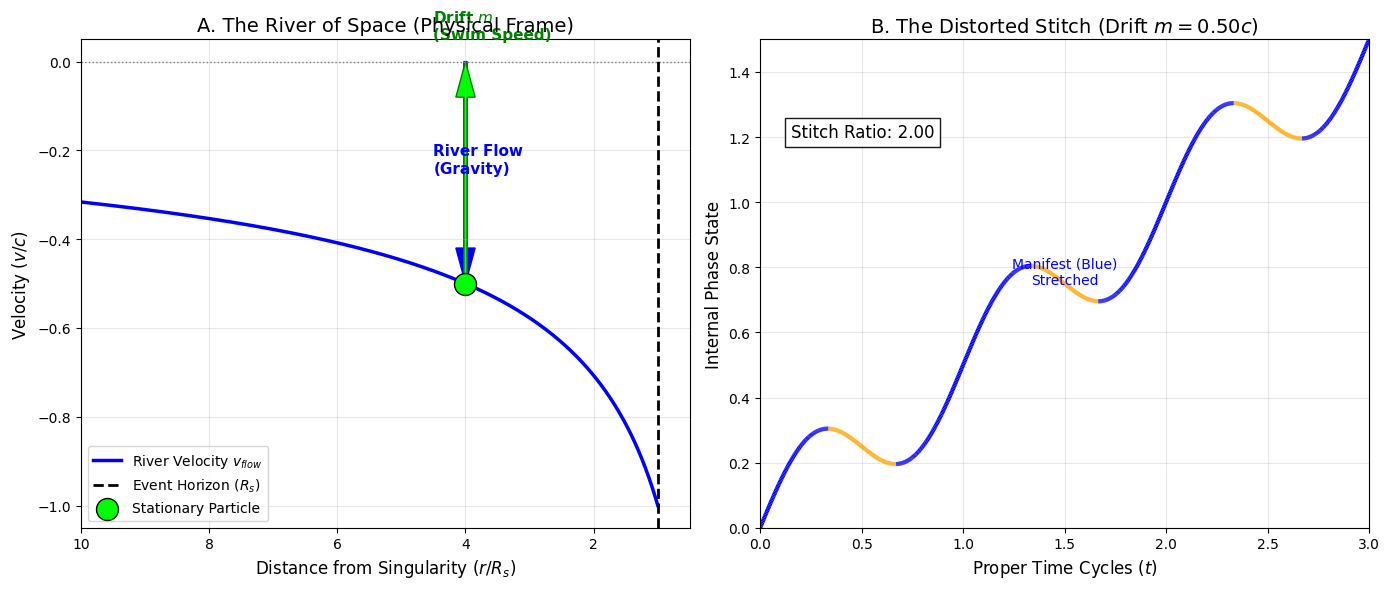

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

class GravityRiverModel:
    """
    Visualizes the 'River Model' of Gravity for the Whitepaper.
    Generates a publication-quality figure showing the relationship between
    Grid Flow, Particle Drift, and the resulting Phase Stitch distortion.
    """

    def __init__(self):
        self.C = 1.0
        self.Rs = 1.0 # Schwarzschild Radius

    def visualize_river_mechanics(self):
        print("\nGenerating Figure 8: Gravity River Mechanics...")

        # --- 1. Setup the River Field ---
        # Distance r from the Black Hole (at r=0)
        # We plot from 10 Rs down to the Horizon (1 Rs)
        r = np.linspace(10.0, 1.0, 500) * self.Rs

        # Velocity of the River (Inward Flow)
        # v_flow = -c * sqrt(Rs/r) (Negative because it falls IN)
        v_flow = -self.C * np.sqrt(self.Rs / r)

        # --- 2. Setup the Swimmer (The Particle) ---
        # We place a particle at r = 4 Rs
        particle_r = 4.0 * self.Rs
        particle_v_flow = -self.C * np.sqrt(self.Rs / particle_r)

        # To stay stationary (dr/dt = 0), the particle must swim OUT at v_swim = -v_flow
        v_swim = -particle_v_flow # This is 'm' (Drift)

        # --- 3. Visualization ---
        # Use a style suitable for academic papers
        plt.rcParams['font.family'] = 'sans-serif'
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # --- Plot 1: The Velocity Field (Physical Space) ---
        ax1.plot(r/self.Rs, v_flow, 'b-', linewidth=2.5, label=r'River Velocity $v_{flow}$')
        ax1.axhline(0, color='gray', linestyle=':', linewidth=1)
        ax1.axvline(1.0, color='k', linestyle='--', linewidth=2, label='Event Horizon ($R_s$)')

        # Draw the Particle Swimmer
        ax1.scatter(particle_r/self.Rs, particle_v_flow, s=250, color='lime', edgecolors='k', zorder=10, label='Stationary Particle')

        # Vector Arrows
        # River Vector (Blue - Inward)
        ax1.arrow(particle_r/self.Rs, 0, 0, particle_v_flow,
                  head_width=0.3, head_length=0.08, fc='blue', ec='blue', length_includes_head=True, width=0.05)
        ax1.text((particle_r/self.Rs) + 0.5, particle_v_flow/2, "River Flow\n(Gravity)", color='blue', fontsize=11, fontweight='bold')

        # Swim Vector (Green - Outward)
        # We draw it opposing the flow to show cancellation
        ax1.arrow(particle_r/self.Rs, particle_v_flow, 0, -particle_v_flow,
                  head_width=0.3, head_length=0.08, fc='lime', ec='green', length_includes_head=True, width=0.05)
        ax1.text((particle_r/self.Rs) + 0.5, particle_v_flow/2 + 0.3, "Drift $m$\n(Swim Speed)", color='green', fontsize=11, fontweight='bold')

        ax1.set_title("A. The River of Space (Physical Frame)", fontsize=14)
        ax1.set_xlabel("Distance from Singularity ($r / R_s$)", fontsize=12)
        ax1.set_ylabel("Velocity ($v/c$)", fontsize=12)
        ax1.set_xlim(10, 0.5) # Invert axis: Far -> Close
        ax1.legend(loc='lower left')
        ax1.grid(True, alpha=0.3)

        # --- Plot 2: The Resulting Stitch (Phase Space) ---
        # Show how this 'Swim' becomes the 'Drift' in phase space

        t = np.linspace(0, 3, 1000)
        k = 2 * np.pi
        A = self.C / k # Strict Mode Constraint
        m = v_swim # The swim speed IS the drift m

        # Wave function in the Swimmer's Frame: y = A sin(kt) + mt
        y = A * np.sin(k * t) + m * t

        # Calculate derivative to color the stitch
        # y' = A*k*cos(kt) + m
        y_prime = A * k * np.cos(k * t) + m

        points = np.array([t, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        colors = ['orange' if yp < 0 else 'blue' for yp in y_prime[:-1]]

        lc = LineCollection(segments, colors=colors, linewidth=3)
        ax2.add_collection(lc)
        ax2.set_xlim(0, 3)
        ax2.set_ylim(np.min(y), np.max(y))

        ax2.set_title(f"B. The Distorted Stitch (Drift $m = {m:.2f}c$)", fontsize=14)
        ax2.set_xlabel("Proper Time Cycles ($t$)", fontsize=12)
        ax2.set_ylabel("Internal Phase State", fontsize=12)
        ax2.grid(True, alpha=0.3)

        # Annotations for ratio
        blue_len = np.sum(y_prime > 0)
        orange_len = np.sum(y_prime < 0)

        if orange_len > 0:
            ratio = blue_len / orange_len
            ratio_text = f"Stitch Ratio: {ratio:.2f}"
        else:
            ratio_text = "Stitch Ratio: ∞"

        ax2.text(0.05, 0.8, ratio_text, transform=ax2.transAxes,
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.9, edgecolor='black'))

        # Helper text
        # Find peaks for placement
        ax2.text(1.5, y[500], "Manifest (Blue)\nStretched", color='blue', ha='center', fontsize=10)

        plt.tight_layout()
        plt.savefig('gravity_river_viz.png', dpi=300)
        print("Visualization saved to gravity_river_viz.png")

if __name__ == "__main__":
    river = GravityRiverModel()
    river.visualize_river_mechanics()